In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd


In [2]:

data = pd.read_csv("/Users/alexis/Downloads/ASTR19_F25_group_project_data.txt",
                   comment="#", sep=r"\s+", header=None)

data.columns = ["day", "time", "height"]

data.head()


,day,time,height
0,1,8:07,6.57
1,1,15:37,-0.39
2,2,8:55,5.38
3,2,16:25,-1.74
4,3,9:45,5.26


In [11]:

def convert_time(t):
    h, m = t.split(":")
    return int(h) + int(m)/60

data["hours"] = data["time"].apply(convert_time)

# fractional day time column
data["t"] = data["day"] + data["hours"] / 24

# easier to work with these arrays
t = data["t"].values
y = data["height"].values


In [12]:

def tide_func(t, A1, w1, p1, A2, w2, p2, C):
    return A1*np.sin(w1*t + p1) + A2*np.sin(w2*t + p2) + C


In [13]:

guess_vals = [3, 6, 0, 1, 12, 0, 3]

best_vals, covar = curve_fit(tide_func, t, y, p0=guess_vals)

best_vals


array([-0.26258219,  6.06410545, -2.14332578,  2.24626784, 12.1609749 ,
       -2.80028915,  2.38740165])

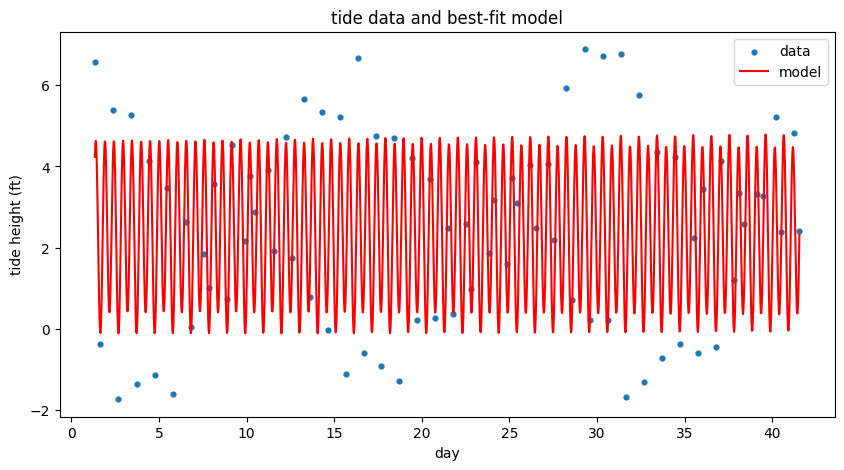

In [14]:
t_fit = np.linspace(min(t), max(t), 1500)
y_fit = tide_func(t_fit, *best_vals)

plt.figure(figsize=(10,5))
plt.scatter(t, y, s=12, label="data")
plt.plot(t_fit, y_fit, color="red", label="model")
plt.xlabel("day")
plt.ylabel("tide height (ft)")
plt.title("tide data and best-fit model")
plt.legend()
plt.savefig("fit_plot.pdf")
plt.show()


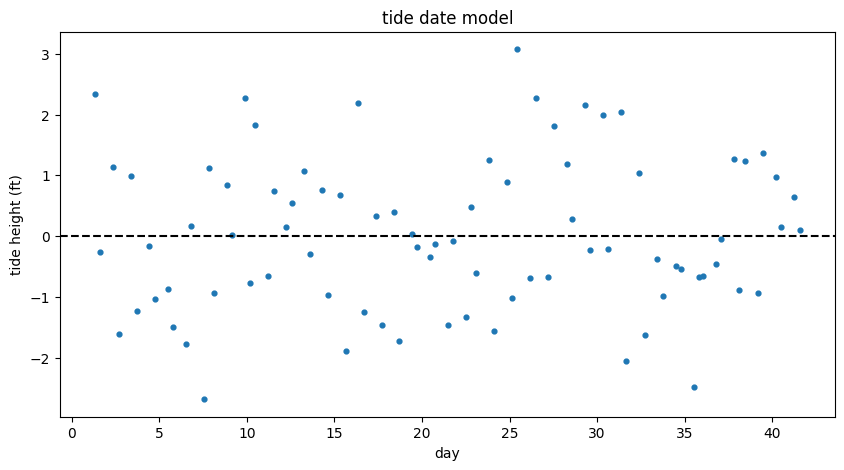

In [15]:
res = y - tide_func(t, *best_vals)

plt.figure(figsize=(10,5))
plt.scatter(t, res, s=12)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("day")
plt.ylabel("tide height (ft)")
plt.title("Difference between data and model")
plt.savefig("residuals_plot.pdf")
plt.show()


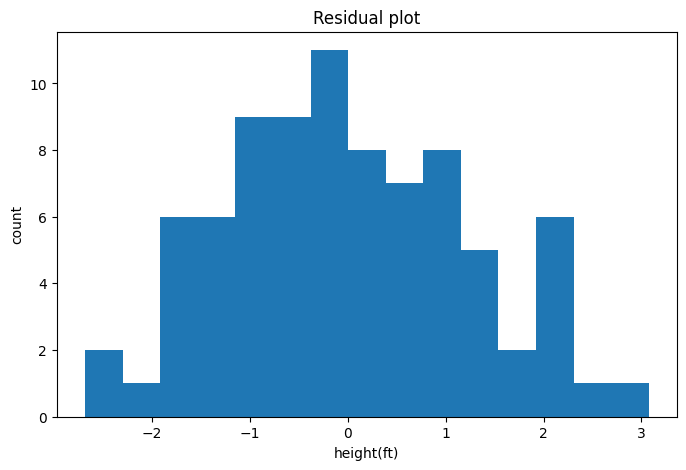

np.float64(1.2429731402492)

In [16]:
plt.figure(figsize=(8,5))
plt.hist(res, bins=15)
plt.xlabel("height(ft)")
plt.ylabel("count")
plt.title("Residual plot")
plt.savefig("residual_hist.pdf")
plt.show()

sigma_res = np.std(res)
sigma_res



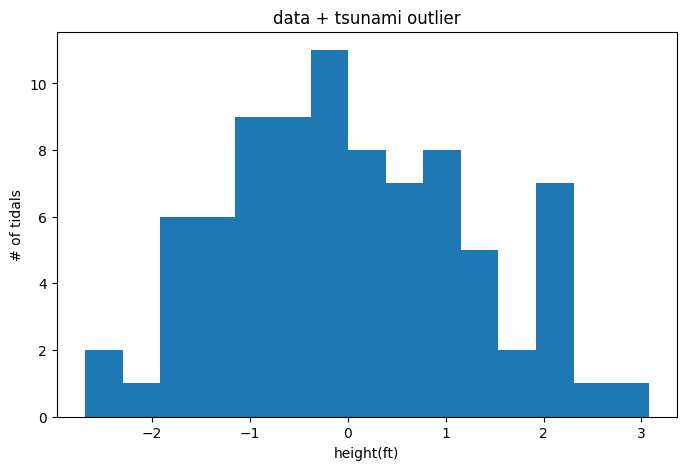

np.float64(1.6090452281205578)

In [17]:
tsunami = 2.0  
res_with_tsunami = np.append(res, tsunami)

plt.figure(figsize=(8,5))
plt.hist(res_with_tsunami, bins=15)
plt.xlabel("height(ft)")
plt.ylabel("# of tidals")
plt.title("data + tsunami outlier")
plt.savefig("tsunami_hist.pdf")
plt.show()


tsunami_sig = tsunami / sigma_res
tsunami_sig